In [1]:
# only adjust settings in this cell
state = 'WV'
root_name = 'Berkeley' # which county will root our first district 
k = 2                  # the state has this number of districts
deviation = 0          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 2 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 896858
Single district upper population limit U = 896858


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Berkeley County to be the root. In our graph, this is vertex # 14


In [6]:
from optimization import districting_heuristic

plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 435 rows, 486 columns and 2092 nonzeros
Model fingerprint: 0xd5a26154
Variable types: 251 continuous, 235 integer (235 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 96 rows and 68 columns
Presolve time: 0.00s
Presolved: 339 rows, 418 columns, 1582 nonzeros
Variable types: 246 continuous, 172 integer (172 binary)

Root relaxation: objective 1.139748e+00, 179 iterations, 0.00 seconds (0.00 work units)



 1628666 619688   42.37461   47   11          -   26.58677      -  10.4  235s
 1672014 634699   31.98107   32   31          -   26.67542      -  10.4  240s
 1706268 646427 infeasible   43               -   26.74281      -  10.4  245s
 1738296 657729   32.64845   36    8          -   26.80455      -  10.4  250s
 1769857 668607 infeasible   41               -   26.86754      -  10.4  255s
found [2, 3, 4, 6, 8, 10, 12, 13, 14, 17, 19, 23, 25, 28, 29, 30, 31, 34, 36, 38, 40, 41, 43, 44, 45, 47, 48, 53, 54] with objective = 33.0
   ^added to list!
 1800961 678865   30.44632   40   30          -   26.93424      -  10.4  260s
 1830222 688970   36.46508   32   32          -   26.99234      -  10.3  265s
 1863072 700132   29.00613   32   12          -   27.00000      -  10.3  270s
 1892093 711410   31.34204   36   11          -   27.00000      -  10.3  275s
 1921686 722465 infeasible   46               -   27.03329      -  10.3  280s
found [2, 3, 5, 6, 7, 9, 10, 12, 14, 16, 20, 21, 22, 23, 24, 

 3730437 1150458 infeasible   40               -   29.60205      -  10.3  635s
 3753320 1153067 infeasible   36               -   29.63877      -  10.3  640s
found [0, 1, 2, 4, 6, 8, 9, 12, 13, 14, 17, 18, 22, 25, 26, 28, 30, 31, 38, 41, 43, 44, 45, 49, 52, 53, 54] with objective = 32.0
   replaced worse solution with objective = 35.0
adding cut saying that objective should be less than 35.0
 3776686 1155291   32.65965   34   23          -   29.67666      -  10.3  645s
found [0, 1, 3, 4, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 29, 30, 34, 38, 40, 41, 43, 44, 45, 47, 48, 49, 52, 53, 54] with objective = 30.0
   replaced worse solution with objective = 35.0
adding cut saying that objective should be less than 34.0
 3799754 1157344 infeasible   26               -   29.71656      -  10.3  650s
 3822578 1158794   33.00000   31    5          -   29.76022      -  10.3  655s
 3846890 1160151   33.57646   30   41          -   29.80693      -  10.3  660s
 3869891 1161222 infeasible   37  

# cut_edges perimeter ave_invpp
0 30 29.7243 9.2117
1 30 30.3744 9.8275
2 31 30.2892 10.1559
3 33 32.6711 12.248
4 32 30.4739 9.9354
5 31 30.1107 9.5942
6 29 30.0952 9.9357
7 32 32.2679 11.7755
8 31 30.6787 10.2243
9 23 27.2175 6.98


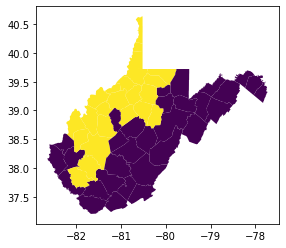

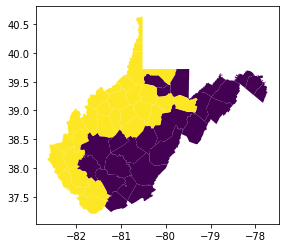

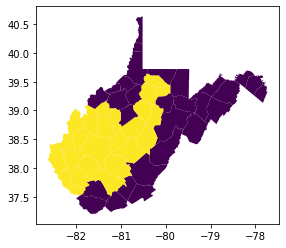

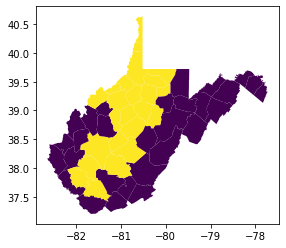

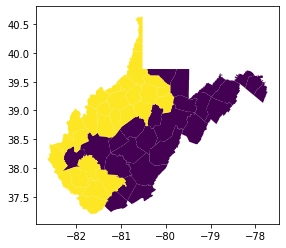

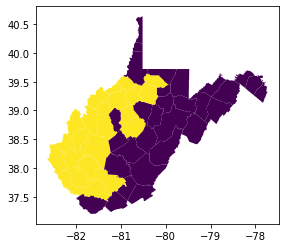

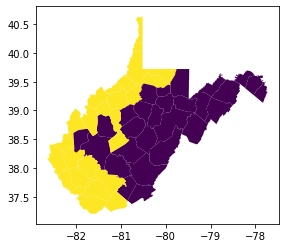

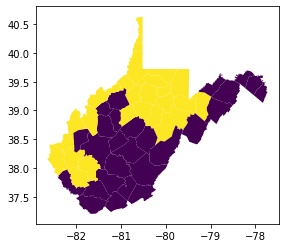

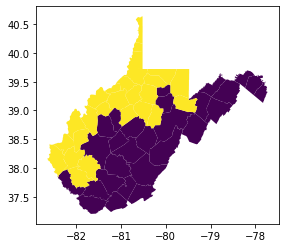

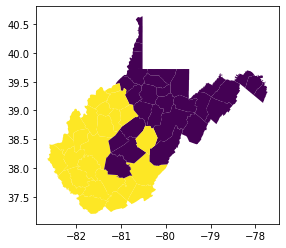

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[0, 1, 3, 4, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 29, 30, 34, 38, 40, 41, 43, 44, 45, 47, 48, 49, 52, 53, 54], [2, 5, 6, 7, 9, 11, 15, 19, 20, 21, 24, 26, 27, 31, 32, 33, 35, 36, 37, 39, 42, 46, 50, 51]], [[3, 4, 8, 10, 11, 12, 13, 14, 16, 17, 18, 25, 26, 30, 33, 38, 40, 41, 43, 44, 49, 52, 53, 54], [0, 1, 2, 5, 6, 7, 9, 15, 19, 20, 21, 22, 23, 24, 27, 28, 29, 31, 32, 34, 35, 36, 37, 39, 42, 45, 46, 47, 48, 50, 51]], [[0, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 20, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 51, 53, 54], [1, 2, 6, 11, 15, 16, 17, 18, 19, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 43, 46, 49, 50, 52]], [[2, 3, 4, 6, 8, 10, 12, 13, 14, 17, 19, 23, 25, 28, 29, 30, 31, 34, 36, 38, 40, 41, 43, 44, 45, 47, 48, 53, 54], [0, 1, 5, 7, 9, 11, 15, 16, 18, 20, 21, 22, 24, 26, 27, 32, 33, 35, 37, 39, 42, 46, 49, 50, 51, 52]], [[1, 3, 4, 8, 10, 12, 13, 14, 15, 18, 23, 25, 26, 30, 37, 38, 40, 41, 43, 44, 48, 49, 52, 53, 54], [0, 2, 5, 6, 7, 9, 11, 16, 1